# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [76]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [77]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = int((len(newsgroups_test.target))/2)
#print(num_test, type(num_test))
test_data, test_labels = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('test label shape:', test_labels.shape)
print('dev label shape:', dev_labels.shape)
print('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [82]:
def P1(num_examples=5):

### STUDENT START ###
    for i in range(num_examples):
        print('Training sample:', i+1, '.')
        print(train_data[i])
        print()
        print('Training Data Label for sample number:', i+1, '.')
        print(newsgroups_train.target_names[train_labels[i]])
        print('__________________________________________________________________________')
### STUDENT END ###

P1()

Training sample: 1 .
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

Training Data Label for sample number: 1 .
comp.graphics
__________________________________________________________________________
Training sample: 2 .


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. J

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [84]:
def P2():

### STUDENT START ###
    # 2a
    vector = CountVectorizer()
    vector_train_data = vector.fit_transform(train_data)
    sample_size = vector_train_data.shape[0]
    vocab_size = vector_train_data.shape[1]
    nonzero_size = vector_train_data.nnz
    
    print('Question 2a:', '\n')    
    print('The vocabulary size is:', vocab_size, '.')
    print('The average number of non-zero features per example is:', nonzero_size/sample_size, '.')
    print('The fraction on non-zero entries is (non-zero/sample size)/(vocabulary size):', (nonzero_size/sample_size)/vocab_size, '.')
    print("__________________________________________________________________________")
    
    #2b
    feature_name = vector.get_feature_names()

    print('Question 2b:', '\n')
    print('The first string is:', feature_name[0], '.')
    print('The last string is:', feature_name[-1], '.')
    print("__________________________________________________________________________")
    
    #2c
    myvocab = ["atheism", "graphics", "space", "religion"]
    vector_2c = CountVectorizer(min_df = 1, vocabulary = myvocab)
    vector_2c_train = vector_2c.fit_transform(train_data)
    sample_size_2c = vector_2c_train.shape[0]
    vocab_size_2c = vector_2c_train.shape[1]
    nonzero_size_2c = vector_2c_train.nnz
    
    print('Question 2c:', '\n')
    print("The updated non-zero features per example is:", nonzero_size_2c/sample_size_2c, '.')
    print("__________________________________________________________________________")
    
    #2d
    vector_2d_bigram = CountVectorizer(analyzer='char', ngram_range=(2,2))
    vector_2d2_train = vector_2d_bigram.fit_transform(train_data)
    
    vector_2d_trigram = CountVectorizer(analyzer='char', ngram_range=(3,3))
    vector_2d3_train = vector_2d_trigram.fit_transform(train_data) 
    
    
    print('Question 2d:', '\n')
    print('The size of vocabulary for bigram data is:' , vector_2d2_train.shape[1], '.')
    print('The size of vocabulary for trigram data is:', vector_2d3_train.shape[1], '.')
    print('The size of the combined bigram and trigram data is:', vector_2d2_train.shape[1] + vector_2d3_train.shape[1], '.')
    print("__________________________________________________________________________")
    
    #2e
    vector_2e = CountVectorizer(min_df=10)
    vector_2e_min10 = vector_2e.fit_transform(train_data)

    print('Question 2e:', '\n')
    print('The size of vocabulary that appear in more than 9 documents is:', vector_2e_min10.shape[1], '.')
    print("__________________________________________________________________________")    
    
    #2f
    # Training data vocabulary size was calculated above (vocab_size)
    vector_dev = CountVectorizer()
    vector_dev_data = vector_dev.fit_transform(dev_data)
    dev_size = vector_dev_data.shape[1] 
    difference = vocab_size - dev_size
    
    print('Question 2f:', '\n')
    print('The size of vocabulary in the training data is:', vocab_size, '.')
    print('The size of vocabulary in the development data is:', dev_size, '.')
    print('The total size of both training and development is:', vocab_size + dev_size, '.')
    print('The difference is:', difference, '.')
    print('The fraction of the total is:', difference/(vocab_size + dev_size), '.')
    print("__________________________________________________________________________")  
    
### STUDENT END ###

P2()

Question 2a: 

The vocabulary size is: 26879 .
The average number of non-zero features per example is: 96.70599803343165 .
The fraction on non-zero entries is (non-zero/sample size)/(vocabulary size): 0.003597827226959026 .
__________________________________________________________________________
Question 2b: 

The first string is: 00 .
The last string is: zyxel .
__________________________________________________________________________
Question 2c: 

The updated non-zero features per example is: 0.26843657817109146 .
__________________________________________________________________________
Question 2d: 

The size of vocabulary for bigram data is: 3291 .
The size of vocabulary for trigram data is: 32187 .
The size of the combined bigram and trigram data is: 35478 .
__________________________________________________________________________
Question 2e: 

The size of vocabulary that appear in more than 9 documents is: 3064 .
____________________________________________________________

(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [85]:
def P3():

### STUDENT START ###
    vector = CountVectorizer()
    vector_train_data = vector.fit_transform(train_data)
    vector_dev_data = vector.transform(dev_data)    
    
    # K-nearest neighbors
    knn_score = 0 
    opt_k = 0
    k_list = np.arange(1, 250) 
        
    # Cycle through different k's to find the optimal
    for k in k_list:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(vector_train_data, train_labels)
        score = metrics.f1_score(dev_labels, knn.predict(vector_dev_data), average='weighted')
                
        # Finding/Replacing the optimal k and its score
        if  score > knn_score:
            knn_score = score
            opt_k = k
    
    print('For K-Nearest Neighhbors:')
    print('The optimal k is:', opt_k, 'which gives an accuracy score of:', knn_score, '.')
    print("__________________________________________________________________________")

    # Multinomial Naive Bayes
    multinb_score = 0 
    opt_a = 0
    a_list = np.arange(0.001, 1, 0.001)
   
    
    # Cycle through the different alphas to find the optimal
    for a in a_list:
        multinb = MultinomialNB(alpha = a)
        multinb.fit(vector_train_data, train_labels)
        a_score = metrics.f1_score(dev_labels, multinb.predict(vector_dev_data), average='weighted')
        
        # Finding/Replacing the optimal alpha and its score
        if a_score > multinb_score:
            multinb_score = a_score
            opt_a = a
    
    print('For Multinomial Niave Bayes:')
    print('The optimal alpha is:', opt_a, 'which gives an accuracy score of:', multinb_score, '.')
    print('__________________________________________________________________________')

    
    # Logistic Regression
    # Initializing parameters - Score, C, and Sum of Squares
    lr_score = 0
    opt_c = 0
    # For this C-list, I zoomed in on the range around 0.1 to fine tune this optimal value
    c_list = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 1, 10]
    ss = 0
    
    # Finding the optimal C
    for c in c_list:
        logreg = LogisticRegression(C = c, penalty='l2')
        logreg.fit(vector_train_data, train_labels)
        f1 = metrics.f1_score(dev_labels, logreg.predict(vector_dev_data), average='macro')
        
        # Finding/Replacing the best parameters:
        if f1 > lr_score:
            lr_score = f1
            opt_c = c

    print('For the Logistic Regression:')
    print('The best C value is', opt_c, 'with an F1 score of', lr_score, '.')
    print()  
    
    # Calculate Sum of Squares for each class
    for c in c_list:
        logreg = LogisticRegression(C = c, penalty='l2')
        logreg.fit(vector_train_data, train_labels)
        ss = logreg.coef_**2
        print('For C = ', c, 'The sum of squares for each class is: \n', ss.sum(axis = 1))
     

    ### STUDENT END ###

P3()

For K-Nearest Neighhbors:
The optimal k is: 112 which gives an accuracy score of: 0.478882866053 .
__________________________________________________________________________
For Multinomial Niave Bayes:
The optimal alpha is: 0.262 which gives an accuracy score of: 0.791886814801 .
__________________________________________________________________________
For the Logistic Regression:
The best C value is 0.3 with an F1 score of 0.693560827773 .

For C =  0.0001 The sum of squares for each class is: 
 [ 0.00770175  0.0119412   0.00943508  0.00910284]
For C =  0.001 The sum of squares for each class is: 
 [ 0.16509345  0.20095275  0.18067094  0.18724278]
For C =  0.01 The sum of squares for each class is: 
 [ 2.5415003   2.93970937  2.86246882  2.25002875]
For C =  0.05 The sum of squares for each class is: 
 [ 14.07320173  13.66910692  14.60408481  11.86067716]
For C =  0.1 The sum of squares for each class is: 
 [ 27.13240193  24.65904945  27.45857736  23.02453923]
For C =  0.15 The sum 

ANSWER:

3(a): For K-nearest neighbors, this is a difficult model for this application.  The vocabulary has a size of 26,879, which makes the number of features large within a sparse matrix.  It would be difficult to find an accurate nearest neighbor in a large and sparse space.  Plus, when the k-value is allowed to be in a large range, like here (1-250), the optimal k-value is 112.  That's a large value to be accurate.

3(b): Naive Bayes assumes independence between features, whereas logistic regression assumes a relationship exists between features (which would benefit the logistic regression model).  However, logistic models also work better with a smaller training data size compared to the feature size.  Because of the large number of features, it looks like here the Niave Bayes performs better.

3(c): As C increases, the sum of squares also increases.

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [86]:
def P4():

### STUDENT START ###
    
    # Creating the vector for the unigram model
    vector = CountVectorizer()
    vector_train_data = vector.fit_transform(train_data)
    features = vector.get_feature_names()
    
    # Training using a logistic regression
    logreg = LogisticRegression(penalty='l2')
    logreg.fit(vector_train_data, train_labels)
    coef = logreg.coef_
    
    # Find the top 5 features for each class
    labels = newsgroups_train.target_names
    print('Top 5 unigram features for each of the 4 classes:')
    print('            ', labels)
    
    top_features = []
    top_weights = []
    
    # Cycle through each of the classes
    for i in range(4):
        coef_list = list(coef[i])
        
        # For each class, sort the weights and grab the top 5
        coef_sort = sorted(coef_list,reverse=True)[:5] 
    
        # Label each of the top 5 weights
        for j in range(5):
            loc = coef_list.index(coef_sort[j])
            feature_list = features[loc]
            top_features.append(feature_list)
            weight = coef.transpose()[loc]
            top_weights.append(weight)     
            
            # Print table rows
            print('{:<15} {:<15.2f} {:<15.2f} {:<15.2f} {:<15.2f}'.format(feature_list, weight[0], weight[1], weight[2], weight[3]))

    print('__________________________________________________________________________')
            
    # Creating the vector for the bigram model
    vector_bi = CountVectorizer(ngram_range=(2,2))
    vector_bi_train = vector_bi.fit_transform(train_data)
    features_bi = vector_bi.get_feature_names()
    
    # Training using a logistic regression
    logreg_bi = LogisticRegression(penalty = 'l2')
    logreg_bi.fit(vector_bi_train, train_labels)
    coef_bi = logreg_bi.coef_    
    
    # Find the top 5 features for each class
    labels = newsgroups_train.target_names
    print('Top 5 bigram features for each of the 4 classes:')
    print('            ', labels)    

    top_bi_features = []
    top_bi_weights = []

    
    # Cycle through each of the classes
    for i in range(4):
        coef_bi_list = list(coef_bi[i])    
    
        # For each class, sort the weights and grab the top 5
        coef_bi_sort = sorted(coef_bi_list,reverse=True)[:5] 
        
        # Label each of the top 5 weights
        for j in range(5):
            loc_bi = coef_bi_list.index(coef_bi_sort[j])
            
            feature_bi_list = features_bi[loc_bi]
            top_bi_features.append(feature_bi_list)
            
            weight_bi = coef_bi.transpose()[loc_bi]
            top_bi_weights.append(weight_bi)     
            
            # Print table rows
            print('{:<15} {:<15.2f} {:<15.2f} {:<15.2f} {:<15.2f}'.format(feature_bi_list, weight_bi[0], weight_bi[1], weight_bi[2], weight_bi[3]))

    print('__________________________________________________________________________')            

### STUDENT END ###

P4()

Top 5 unigram features for each of the 4 classes:
             ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
deletion        1.13            -0.40           -0.42           -0.40          
atheists        1.03            -0.10           -0.32           -0.84          
bobby           0.99            -0.22           -0.34           -0.46          
religion        0.95            -0.62           -0.79           -0.06          
atheism         0.94            -0.41           -0.45           -0.43          
graphics        -0.76           1.94            -1.34           -0.76          
image           -0.58           1.35            -0.83           -0.47          
file            -0.33           1.27            -0.81           -0.63          
3d              -0.36           1.12            -0.70           -0.38          
computer        0.14            0.98            -0.68           -0.49          
space           -1.26           -1.32           2.16            -1.17

ANSWER:  This is interesting!  It seems that the top unigram results (mostly) resulted in words that relate to the labels.  With atheism, it would be expected that atheism/religion would be top results.  I'm not sure where "bobby" or "deletion" would fit without reading the topic.  The topics of "Graphics" and "Space" yielded what I would expect to fall under those subjects.  For Religion, everything fit except for "FBI".

For the bigram models, the top results contained a lot of common words ("that", "the", "and", "is"), and so the correlation and relatibility of the words to the topic are less obvious.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [87]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):

    # Initializing parameters
    preprocess_data = []
    
    #Processing the data
    
    for i in s:
        # Lowercase
        i = i.lower()
        
        # Replace punctuation and symbols with spaces
        i = re.sub(r'[!#$%&*();:",.?]', ' ', i)
        
        # Replace email/domain with "email"
        i = re.sub(r'@[\w.]+', '<email>', i)
                   
        # Remove all numbers
        i = re.sub('\d+', '', i)
        
        preprocess_data.append(i)
    
    return preprocess_data    

### STUDENT END ###

def P5():
### STUDENT START ###
    pre_train_data = better_preprocessor(train_data)

    vector_pre = CountVectorizer()
    vector_pre_train_data = vector_pre.fit_transform(pre_train_data)
    vector_dev_data = vector_pre.transform(dev_data)
    
    # Use the c values optimized from above
    logreg_pre = LogisticRegression(C = 0.3, penalty = 'l2')
    logreg_pre.fit(vector_pre_train_data, train_labels)

    f1 = metrics.f1_score(dev_labels, logreg_pre.predict(vector_dev_data), average='macro')
    vocab_zise = 26879
    pre_vocab_size = vector_pre_train_data.shape[1]
    
    print('After preprocessing, our F1 score is:', f1, '.')    
    print('The preprocessed/reduced vocabulary size is:', pre_vocab_size, '.')
    
### STUDENT END ###
P5()

After preprocessing, our F1 score is: 0.693320775668 .
The preprocessed/reduced vocabulary size is: 24235 .


Note: I tried several preprocessing techniques, but this is the one that gave the highest F1 score, although it did not improve the original F1 score by too much (0.679), which is about a 2% increase.  

(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

L2 logistic Regression outputs 107516 non-zero weights.
__________________________________________________________________________

L1 C Value, Number of non-zero weights, Accuracy of L2 Model
[0.001, 5, 0.378698224852071]
[0.01, 36, 0.48668639053254437]
[0.05, 207, 0.65236686390532539]
[0.1, 364, 0.69230769230769229]
[0.15, 515, 0.69230769230769229]
[0.2, 648, 0.69378698224852076]
[0.25, 779, 0.68786982248520712]
[0.3, 887, 0.66420118343195267]
[0.35, 981, 0.68934911242603547]
[0.4, 1079, 0.66420118343195267]
[0.45, 1129, 0.68639053254437865]
[0.5, 1258, 0.68343195266272194]
[1, 1853, 0.68639053254437865]
[10, 4968, 0.70562130177514792]
__________________________________________________________________________

The non-zero weights with L1 logistic regression is much lower compared to the L2 model.
__________________________________________________________________________


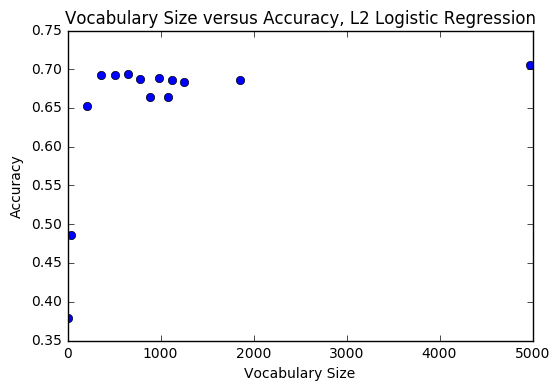

In [89]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)
    
### STUDENT START ###
    vector = CountVectorizer()
    vector_train_data = vector.fit_transform(train_data)
    features = vector.get_feature_names()
    
    # Train a logistic regression using L2 penalty, and count the nonzeros
    logreg_l2 = LogisticRegression(penalty='l2', tol=0.01)
    logreg_l2.fit(vector_train_data, train_labels)            
    coef_l2 = logreg_l2.coef_
    nonzero = np.count_nonzero(coef_l2)
    
    print('L2 logistic Regression outputs', nonzero, 'non-zero weights.')
    print('__________________________________________________________________________')
    print()

    # Setup a logistic regression using L1 penalty
    accuracy_list=[]
    vocab_size=[]
   
    # Begin a table with column titles
    print('L1 C Value, Number of non-zero weights, Accuracy of L2 Model')

    # Train the L1 logistic regression for each C value, and print the nonzeros and accuracies
    # Used c_list from above, without the lowest value of 0.0001
    
    c_list = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 1, 10]
    for c in c_list:
        logreg_l1 = LogisticRegression(penalty='l1', C=c, tol=0.01)
        logreg_l1.fit(vector_train_data, train_labels)            
        coef_l1 = logreg_l1.coef_       
        
        # Return the indices of nonzero elements, and eliminate zero weights
        nonzero_idx = np.nonzero(coef_l1)[1]
        new_vocab = []
        for i in np.unique(nonzero_idx):
            new_vocab.append(features[i])
       
        vector_vocab = CountVectorizer(vocabulary = new_vocab)
        vector_vocab_train = vector_vocab.transform(train_data)
        vector_vocab_dev = vector_vocab.transform(dev_data)
        
        # Retrain a model using the reduced vocabulary
        logreg_l2.fit(vector_vocab_train, train_labels) 
        accuracy = logreg_l2.score(vector_vocab_dev, dev_labels)
        accuracy_list.append(accuracy)
        vocab_size.append(np.count_nonzero(coef_l1))
        
        # Print the row: c value, non-zero weights, and accuracy
        row = [c, np.count_nonzero(coef_l1), accuracy]
        print(row)

    print('__________________________________________________________________________') 
    print()    
    print('The non-zero weights with L1 logistic regression is much lower compared to the L2 model.')
    print('__________________________________________________________________________')
    
    plt.plot(vocab_size, accuracy_list, 'o')
    plt.title('Vocabulary Size versus Accuracy, L2 Logistic Regression')  
    plt.ylabel('Accuracy') 
    plt.xlabel('Vocabulary Size') 
    plt.show()

    ### STUDENT END ###
    
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [90]:
def P7():

### STUDENT START ###
    vector_tfid = TfidfVectorizer() 
    vector_tfid.fit(train_data)
    
    vector_tfid_train = vector_tfid.transform(train_data)
    vector_tfid_dev = vector_tfid.transform(dev_data)

    # Logistic regression model, C=100
    logreg_td = LogisticRegression(penalty='l2', C=100)
    logreg_td.fit(vector_tfid_train, train_labels)
    logreg_td_pred = logreg_td.predict(vector_tfid_dev)
    logreg_td_prob = logreg_td.predict_proba(vector_tfid_dev)
    accuracy = metrics.f1_score(dev_labels, logreg_td_pred, average='weighted')
    

    print('The TfidVectorizer accuary is:', accuracy, '.') 
    print('__________________________________________________________________________') 
    
    # Calculate R value for each document
    # The top 3 documents where the ratio R is largest 
    r = []
    incorrect_doc = [] 
    
    for i in range(vector_tfid_dev.shape[0]):
        max_pred_prob = logreg_td_prob[i].max()
        correct_labels = dev_labels[i]
        prob_correct = logreg_td_prob[i][correct_labels]
        r.append(max_pred_prob * 1.00 / prob_correct)



    print('The top 3 documents with the highest R ratio are:')
    print()

    r_sorted = sorted(r, reverse = True)
    for i in range(3):
        doc = r.index(r_sorted[i])
        incorrect_doc.append(dev_data[doc])
        print(dev_data[doc])
        print('__________________________________________________________________________')        
    
    # I was curious about a confustion matrix, so I wanted to add this here...
    confusion = confusion_matrix(dev_labels, logreg_td_pred)
    print('Confusion Matrix')
    print(newsgroups_train.target_names)
    print(confusion)

## STUDENT END ###

P7()

The TfidVectorizer accuary is: 0.759766242785 .
__________________________________________________________________________
The top 3 documents with the highest R ratio are:

I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anyt

ANSWER: One of the differences is that TfidVectorizer ("TF") contains a term frequency that CountVectorizer doesn't have.  This is applied both to each document, but the inverse of this is applied to the entire set of documents.  This model would adjust for different words appearing more frequently.

The first topic that I see that requires additional testing is that "atheism" is a type of "religion" (albeit a religion that doesn't believe in a god(s)).  Since these subjects are similar, the frequency of the same words would be expected, and therefore the classifications can be easily mistaken.  As we see in the confusion matrix above, the highest mistaken classifications are these topics.  This also applies to Space mislabeled as Graphics, with the third highest mistaken classifications.

The second mistake/adjustment I see is that these articles contain a lot of symbols, characters, and abbreviations that may skew the result.  Possibly removing these, as we did above, will yield a better classification.

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

In [91]:
def better_preprocessor(s):

    # Initializing parameters
    preprocess_data = []
    
    #Processing the data
    
    for i in s:
        # Lowercase
        i = i.lower()
        
        # Replace punctuation and symbols with spaces
        i = re.sub(r'[!#$%&*()-;:",.?]', ' ', i)
        
        # Replace email/domain with "email"
        i = re.sub(r'@[\w.]+', '<email>', i)
                   
        # Remove all numbers
        i = re.sub('\d+', '', i)
        
        preprocess_data.append(i)
    
    return preprocess_data   

pre_train_data = better_preprocessor(train_data)

vector_tfid = TfidfVectorizer() 
vector_tfid.fit(pre_train_data)

vector_tfid_train = vector_tfid.transform(pre_train_data)
vector_tfid_dev = vector_tfid.transform(dev_data)

# Logistic regression model, C=100, similar to immediately above.
logreg_td = LogisticRegression(penalty='l2', C=100)
logreg_td.fit(vector_tfid_train, train_labels)
logreg_td_pred = logreg_td.predict(vector_tfid_dev)
logreg_td_prob = logreg_td.predict_proba(vector_tfid_dev)
accuracy = metrics.f1_score(dev_labels, logreg_td_pred, average='weighted')

print('The original TfidVectorizer accuary is: 0.759766242785 .')
print('The revised TfidVectorizer accuary is:', accuracy, '.') 

The original TfidVectorizer accuary is: 0.759766242785 .
The revised TfidVectorizer accuary is: 0.757669269909 .


Note: Performing the same transformations as above does not improve accuracy using TfidVectorizer.  Good to know!